In [204]:
import numpy as np
import pandas as pd
import os
from scipy.stats import pearsonr,spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [205]:
ndvi=pd.read_csv(r"C:\Users\rishi\ml_projects\climate\2021_data\nlst_scaled\August_NLST.csv",index_col=0)
n02=pd.read_csv(r"C:\Users\rishi\ml_projects\climate\2021_data\O3\August_O3.csv",index_col=0)
ntl=pd.read_csv(r"C:\Users\rishi\ml_projects\climate\2018_data\NTL\August_NTL.csv",index_col=0)

In [206]:
ntl

,78.036735138125,78.102088894375,78.16744265062499,78.232796406875,78.29815016312502,78.363503919375,78.428857675625,78.494211431875,78.559565188125,78.624918944375,78.69027270062499,78.755626456875,78.82098021312501,78.886333969375,78.951687725625,79.017041481875
17.885359,0.224752,0.395724,0.494732,0.494069,0.465599,0.292358,0.640708,0.558455,0.000000,0.031681,0.000000,0.059094,0.054908,0.000000,0.000000,0.000000
17.853064,0.178554,0.706252,0.560119,0.156466,0.327662,0.082181,1.016857,1.307273,0.009422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008208
17.820768,0.089683,1.021002,0.588512,0.633260,0.577581,0.117747,0.706055,1.494606,0.356206,0.007541,0.181851,0.001433,0.000000,0.000000,0.002180,0.070456
17.788473,0.072861,0.558180,0.975345,0.765667,0.597272,0.000000,0.000000,0.083938,0.036868,0.000000,0.012169,0.003343,0.023638,0.000000,0.000000,0.000000
17.756178,0.493239,0.641525,1.288978,0.852291,0.710228,0.002729,0.084763,0.000000,0.016825,0.000000,0.085112,0.000000,0.000000,0.000000,0.000000,0.000000
17.723882,0.593619,0.218579,0.435205,1.107702,0.769264,0.421398,0.010485,0.000000,0.000000,0.052610,0.000000,0.000000,0.000000,0.000000,0.000000,0.114265
17.691587,0.202163,0.035822,0.000488,0.173276,0.955668,1.119887,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125072
17.659291,0.455740,0.043173,0.471607,0.187556,1.273887,1.486454,0.339187,0.000000,0.000000,0.000000,0.047275,0.000000,0.024014,0.145580,0.000000,0.296751
17.626996,1.150789,0.429278,0.051822,0.320350,0.648030,1.058616,0.225737,0.000000,0.000000,0.163297,0.377587,0.000000,0.092176,0.282567,0.120692,0.672445
17.594700,1.141942,0.056535,0.762480,0.772377,1.415258,3.277696,2.430853,2.272086,0.395370,1.532803,0.581047,0.166168,0.539884,0.603189,1.500191,0.809228


In [207]:
n02

,78.036735138125,78.102088894375,78.16744265062499,78.232796406875,78.29815016312502,78.363503919375,78.428857675625,78.494211431875,78.559565188125,78.624918944375,78.69027270062499,78.755626456875,78.82098021312501,78.886333969375,78.951687725625,79.017041481875
17.885359,0.124162,0.124367,0.124164,0.124190,0.124114,0.124308,0.123992,0.124091,0.123873,0.124090,0.124001,0.123854,0.124143,0.124092,0.123976,0.124168
17.853064,0.124110,0.124338,0.124137,0.124041,0.124105,0.123877,0.124277,0.123826,0.124036,0.124031,0.123958,0.123876,0.124022,0.124040,0.123880,0.123890
17.820768,0.123992,0.124323,0.124075,0.123823,0.124086,0.124065,0.124276,0.123981,0.124193,0.123695,0.124044,0.124101,0.124103,0.124019,0.123983,0.124017
17.788473,0.124034,0.124186,0.124028,0.123865,0.124128,0.124132,0.123954,0.124044,0.123892,0.123754,0.123936,0.123974,0.124062,0.123810,0.124226,0.124150
17.756178,0.123994,0.124095,0.124274,0.124052,0.124078,0.124130,0.124061,0.123692,0.124198,0.124026,0.123843,0.123810,0.124195,0.124058,0.124213,0.124457
17.723882,0.124257,0.123986,0.124170,0.123970,0.124192,0.124061,0.124000,0.123836,0.124078,0.124162,0.124022,0.123966,0.124332,0.124248,0.124414,0.124621
17.691587,0.123967,0.124040,0.123997,0.123855,0.124167,0.123937,0.123939,0.124396,0.124077,0.124070,0.123967,0.124184,0.124196,0.124297,0.124289,0.124531
17.659291,0.123796,0.124093,0.123894,0.124072,0.124103,0.123975,0.124025,0.124367,0.124271,0.124041,0.124027,0.124171,0.124118,0.124412,0.124508,0.124518
17.626996,0.123997,0.124023,0.124135,0.123968,0.124112,0.123893,0.123996,0.124092,0.124333,0.124222,0.124156,0.124054,0.124237,0.124386,0.124421,0.124550
17.594700,0.124017,0.123905,0.123986,0.123756,0.124061,0.123791,0.123929,0.124545,0.124276,0.124298,0.124271,0.124019,0.124063,0.124351,0.124330,0.124485


In [208]:
n02.columns

Index(['78.036735138125', '78.102088894375', '78.16744265062499',
       '78.232796406875', '78.29815016312502', '78.363503919375',
       '78.428857675625', '78.494211431875', '78.559565188125',
       '78.624918944375', '78.69027270062499', '78.755626456875',
       '78.82098021312501', '78.886333969375', '78.951687725625',
       '79.017041481875'],
      dtype='object')

In [209]:
n02.index

Index([17.885359334166665,      17.8530638825, 17.820768430833333,
       17.788472979166663,      17.7561775275,  17.72388207583333,
       17.691586624166668, 17.659291172499998, 17.626995720833335,
       17.594700269166665, 17.562404817500003, 17.530109365833333,
       17.497813914166663,      17.4655184625,  17.43322301083333,
       17.400927559166668, 17.368632107499998, 17.336336655833335,
       17.304041204166666, 17.271745752499996, 17.239450300833333,
       17.207154849166667,      17.1748593975,  17.14256394583333,
       17.110268494166668, 17.077973042500002,  17.04567759083333,
        17.01338213916667, 16.981086687499996, 16.948791235833333],
      dtype='float64')

In [210]:
def separate(df,rows,columns):
    roi=[]
    for row in rows:
        for col in columns:
            roi.append(df.at[row,col])
            df.at[row,col]=np.nan
    return roi
    

In [211]:
rows=[17.4655184625,  17.43322301083333,
       17.400927559166668, 17.368632107499998, 17.336336655833335]
cols=['78.428857675625', '78.494211431875', '78.559565188125']
x=separate(n02,rows,cols)
x

[0.1242452785372734,
 0.1240592673420906,
 0.1243370398879051,
 0.1243764832615852,
 0.1240579113364219,
 0.1243775188922882,
 0.1241385191679,
 0.1243322268128395,
 0.1245627775788307,
 0.1241665780544281,
 0.1241504028439521,
 0.124459333717823,
 0.1243005767464637,
 0.1239866241812706,
 0.1242769733071327]

In [212]:
exclude_vals=[]
total_count=-1
for i in range(2018, 2024):
    dir_path = fr"C:\Users\rishi\ml_projects\climate\{i}_data\NTL"
    filenames = os.listdir(dir_path)

    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }

    # Sort the filenames based on the month extracted from the filename
    sorted_filenames = sorted(filenames, key=lambda x: month_mapping[x.split('_')[0]])
    for filename in sorted_filenames:
        total_count+=1
        filepath = os.path.join(dir_path, filename)
        df = pd.read_csv(filepath, index_col=0)
        count=0
        for _, row in df.iterrows():
            count += (row == 0).sum()
        if(count>=df.shape[0]*df.shape[1]/5):
            exclude_vals.append(total_count)
            #print(print(f"year: {i} , month :{filename}, {total_count}"))
total_count=-6
for i in range(2018, 2024):
    dir_path = fr"C:\Users\rishi\ml_projects\climate\{i}_data\nlst_scaled"
    filenames = os.listdir(dir_path)

    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }

    # Sort the filenames based on the month extracted from the filename
    sorted_filenames = sorted(filenames, key=lambda x: month_mapping[x.split('_')[0]])
    for filename in sorted_filenames:
        total_count+=1
        filepath = os.path.join(dir_path, filename)
        df = pd.read_csv(filepath, index_col=0)
        count=0
        for _, row in df.iterrows():
            count += (row == 0).sum()
        if(count>=df.shape[0]*df.shape[1]/5):
            exclude_vals.append(total_count)
            #print(print(f"year: {i} , month :{filename}, {total_count}"))
exclude_vals=list(set(exclude_vals))
exclude_vals.sort()
exclude_vals

[1, 2, 13, 15, 25, 26, 39, 49, 61, 63]

In [213]:
months = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
total_count=-1
CO_all_vals = []
NO2_all_vals = []
O3_all_vals = []
SO2_all_vals = []
HCHO_all_vals = []
NLST_all_vals = []
NDVI_all_vals = []
NTL_all_vals = []

CO_GHMC=[]
NO2_GHMC=[]
O3_GHMC=[]
SO2_GHMC=[]
HCHO_GHMC=[]
NLST_GHMC=[]
NDVI_GHMC=[]
NTL_GHMC=[]

CO_Avg = []
NO2_Avg = []
O3_Avg = []
SO2_Avg = []
HCHO_Avg = []
NLST_Avg = []
NDVI_Avg = []
NTL_Avg = []

for year in range(2018,2024):
    for month in range(1,13):
        if(year == 2018 and month in range(1,6)):
            continue
        total_count+=1
        if(total_count in exclude_vals):
            continue
        CO_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\CO\{months[month]}_CO.csv", index_col=0)
        CO_r = separate(CO_df, rows, cols)  # Assuming you have a function 'separate'
        CO_vals = [val for sublist in CO_df.to_numpy() for val in sublist]
        CO_all_vals.append(CO_vals)
        CO_GHMC.append(CO_r)
        CO_Avg.append(np.mean(CO_r))

        # Reading and processing NO2 data
        NO2_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\NO2\{months[month]}_NO2.csv", index_col=0)
        NO2_df.interpolate(method='linear', inplace=True)
        NO2_r = separate(NO2_df, rows, cols)
        NO2_vals = [val for sublist in NO2_df.to_numpy() for val in sublist]
        NO2_all_vals.append(NO2_vals)
        NO2_GHMC.append(NO2_r)
        NO2_Avg.append(np.mean(NO2_r))

        # Reading and processing O3 data
        O3_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\O3\{months[month]}_O3.csv", index_col=0)
        O3_r = separate(O3_df, rows, cols)
        O3_vals = [val for sublist in O3_df.to_numpy() for val in sublist]
        O3_all_vals.append(O3_vals)
        O3_GHMC.append(O3_r)
        O3_Avg.append(np.mean(O3_r))

        # Reading and processing SO2 data
        SO2_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\SO2\{months[month]}_SO2.csv", index_col=0)
        SO2_r = separate(SO2_df, rows, cols)
        SO2_vals = [val for sublist in SO2_df.to_numpy() for val in sublist]
        SO2_all_vals.append(SO2_vals)
        SO2_GHMC.append(SO2_r)
        SO2_Avg.append(np.mean(SO2_r))
        # Reading and processing HCHO data
        HCHO_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\HCHO\{months[month]}_HCHO.csv", index_col=0)
        HCHO_r = separate(HCHO_df, rows, cols)
        HCHO_vals = [val for sublist in HCHO_df.to_numpy() for val in sublist]
        HCHO_all_vals.append(HCHO_vals)
        HCHO_GHMC.append(HCHO_r)
        HCHO_Avg.append(np.mean(HCHO_r))
        # Reading and processing NLST data
        NLST_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\nlst_scaled\{months[month]}_NLST.csv", index_col=0)
        NLST_r = separate(NLST_df, rows, cols)
        NLST_vals = [val for sublist in NLST_df.to_numpy() for val in sublist]
        NLST_all_vals.append(NLST_vals)
        NLST_GHMC.append(NLST_r)
        NLST_Avg.append(np.mean(NLST_r))
        # Reading and processing NDVI data
        NDVI_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\ndvi_scaled\{months[month]}_NDVI.csv", index_col=0)
        NDVI_r = separate(NDVI_df, rows, cols)
        NDVI_vals = [val for sublist in NDVI_df.to_numpy() for val in sublist]
        NDVI_all_vals.append(NDVI_vals)
        NDVI_GHMC.append(NDVI_r)
        NDVI_Avg.append(np.mean(NDVI_r))
        # Reading and processing NTL data
        NTL_df = pd.read_csv(fr"C:\Users\rishi\ml_projects\climate\{year}_data\NTL\{months[month]}_NTL.csv", index_col=0)
        NTL_r = separate(NTL_df, rows, cols)
        NTL_vals = [val for sublist in NTL_df.to_numpy() for val in sublist]
        NTL_all_vals.append(NTL_vals)
        NTL_GHMC.append(NTL_r)
        NTL_Avg.append(np.mean(NTL_r))
        

In [214]:
NTL_Avg

[48.31706746419271,
 43.271276982625324,
 38.96825103759765,
 43.72646980285644,
 37.775281016031904,
 41.43218574523926,
 40.43017845153808,
 41.426554361979164,
 36.5260814666748,
 38.402464930216475,
 37.13055839538574,
 35.52767346700033,
 38.245645141601564,
 38.944519678751625,
 36.80177370707194,
 40.05156237284343,
 43.72523969014485,
 38.21024055480957,
 31.165843073527018,
 31.481863276163736,
 34.07513605753581,
 31.214905548095704,
 26.17521069844564,
 38.95482457478841,
 39.67055155436198,
 36.89074198404948,
 39.33848101298015,
 40.55345687866211,
 35.903399276733396,
 32.19046185811361,
 37.13585688273112,
 33.193650309244795,
 39.55342381795247,
 37.86054280598958,
 38.438694890340166,
 38.149949391682945,
 39.67520421346028,
 45.54963251749675,
 40.06244036356608,
 39.14731165568034,
 38.57503700256348,
 35.676361592610675,
 34.20494117736816,
 41.40832786560058,
 38.750152587890625,
 36.731732813517254,
 41.697169367472334,
 42.9547779083252,
 44.6555591583252,
 41.92

In [215]:
CO_all_vals = CO_GHMC
NO2_all_vals = NO2_GHMC
O3_all_vals = O3_GHMC
SO2_all_vals = SO2_GHMC
HCHO_all_vals = HCHO_GHMC
NLST_all_vals = NLST_GHMC
NDVI_all_vals = NDVI_GHMC
NTL_all_vals = NTL_GHMC


CO_all_vals = [ele for sublist in CO_all_vals for ele in sublist]
NO2_all_vals = [ele for sublist in NO2_all_vals for ele in sublist]
O3_all_vals = [ele for sublist in O3_all_vals for ele in sublist]
SO2_all_vals = [ele for sublist in SO2_all_vals for ele in sublist]
HCHO_all_vals = [ele for sublist in HCHO_all_vals for ele in sublist]
NLST_all_vals = [ele for sublist in NLST_all_vals for ele in sublist]
NDVI_all_vals = [ele for sublist in NDVI_all_vals for ele in sublist]
NTL_all_vals = [ele for sublist in NTL_all_vals for ele in sublist]
print(np.shape(CO_all_vals))

(855,)


In [216]:
CO_corr_nlst, CO_p_nlst = spearmanr(CO_all_vals, NLST_all_vals)
NO2_corr_nlst, NO2_p_nlst = spearmanr(NO2_all_vals, NLST_all_vals)
O3_corr_nlst, O3_p_nlst = spearmanr(O3_all_vals, NLST_all_vals)
SO2_corr_nlst, SO2_p_nlst = spearmanr(SO2_all_vals, NLST_all_vals)
HCHO_corr_nlst, HCHO_p_nlst = spearmanr(HCHO_all_vals, NLST_all_vals)

print("Spearman correlations with NLST:")
print(f"CO: Correlation = {CO_corr_nlst}")
print(f"NO2: Correlation = {NO2_corr_nlst}")
print(f"O3: Correlation = {O3_corr_nlst}")
print(f"SO2: Correlation = {SO2_corr_nlst}")
print(f"HCHO: Correlation = {HCHO_corr_nlst}")

Spearman correlations with NLST:
CO: Correlation = 0.17647044819392219
NO2: Correlation = 0.07489047900252484
O3: Correlation = 0.7036256346926802
SO2: Correlation = -0.15006654642066966
HCHO: Correlation = 0.4544591400830254


In [217]:
# Calculate Spearman correlations for each pollutant with NDVI
CO_corr_ndvi, CO_p_ndvi = spearmanr(CO_all_vals, NDVI_all_vals)
NO2_corr_ndvi, NO2_p_ndvi = spearmanr(NO2_all_vals, NDVI_all_vals)
O3_corr_ndvi, O3_p_ndvi = spearmanr(O3_all_vals, NDVI_all_vals)
SO2_corr_ndvi, SO2_p_ndvi = spearmanr(SO2_all_vals, NDVI_all_vals)
HCHO_corr_ndvi, HCHO_p_ndvi = spearmanr(HCHO_all_vals, NDVI_all_vals)

# Print the results for correlations with NDVI
print("\nSpearman correlations with NDVI:")
print(f"CO: Correlation = {CO_corr_ndvi}")
print(f"NO2: Correlation = {NO2_corr_ndvi}")
print(f"O3: Correlation = {O3_corr_ndvi}")
print(f"SO2: Correlation = {SO2_corr_ndvi}")
print(f"HCHO: Correlation = {HCHO_corr_ndvi}")



Spearman correlations with NDVI:
CO: Correlation = -0.27384945817892364
NO2: Correlation = -0.4375905675019478
O3: Correlation = 0.016326091773020725
SO2: Correlation = -0.10134400272168088
HCHO: Correlation = -0.26201018480013427


In [218]:
# Calculate Spearman correlations for each pollutant with NTL
CO_corr_ntl, CO_p_ntl = spearmanr(CO_all_vals, NTL_all_vals)
NO2_corr_ntl, NO2_p_ntl = spearmanr(NO2_all_vals, NTL_all_vals)
O3_corr_ntl, O3_p_ntl = spearmanr(O3_all_vals, NTL_all_vals)
SO2_corr_ntl, SO2_p_ntl = spearmanr(SO2_all_vals, NTL_all_vals)
HCHO_corr_ntl, HCHO_p_ntl = spearmanr(HCHO_all_vals, NTL_all_vals)

# Print the results for correlations with NTL
print("\nSpearman correlations with NTL:")
print(f"CO: Correlation = {CO_corr_ntl}")
print(f"NO2: Correlation = {NO2_corr_ntl}")
print(f"O3: Correlation = {O3_corr_ntl}")
print(f"SO2: Correlation = {SO2_corr_ntl}")
print(f"HCHO: Correlation = {HCHO_corr_ntl}")



Spearman correlations with NTL:
CO: Correlation = 0.058113761498890484
NO2: Correlation = 0.4135633629807628
O3: Correlation = -0.1117995502007662
SO2: Correlation = 0.06954597309882643
HCHO: Correlation = 0.052292463194142866


          HCHO        O3       NO2        CO       SO2      NLST      NDVI  \
HCHO  1.000000  0.163890  0.467381  0.594594  0.184200  0.194274 -0.254546   
O3    0.163890  1.000000 -0.374260 -0.257859 -0.339574 -0.074093  0.043097   
NO2   0.467381 -0.374260  1.000000  0.618202  0.404609  0.209258 -0.432239   
CO    0.594594 -0.257859  0.618202  1.000000  0.444109  0.278174 -0.263798   
SO2   0.184200 -0.339574  0.404609  0.444109  1.000000  0.088354 -0.103273   
NLST  0.194274 -0.074093  0.209258  0.278174  0.088354  1.000000 -0.056136   
NDVI -0.254546  0.043097 -0.432239 -0.263798 -0.103273 -0.056136  1.000000   
NTL   0.042436 -0.088954  0.345988  0.040329  0.062887  0.056073 -0.530848   

           NTL  
HCHO  0.042436  
O3   -0.088954  
NO2   0.345988  
CO    0.040329  
SO2   0.062887  
NLST  0.056073  
NDVI -0.530848  
NTL   1.000000  


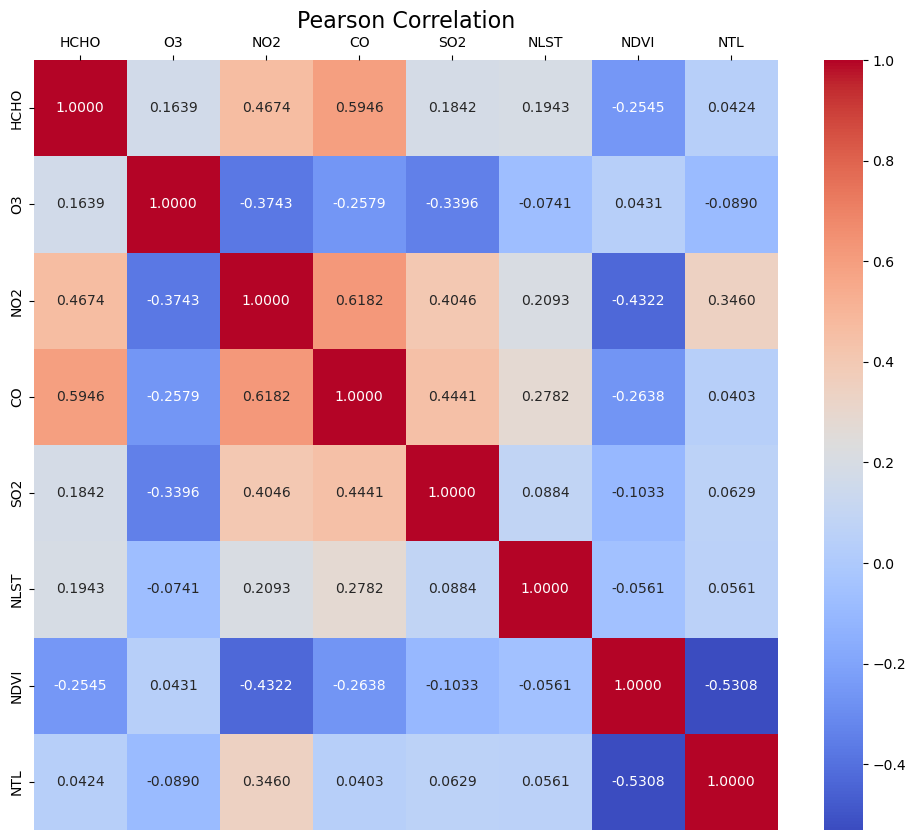

In [219]:
data = pd.DataFrame({
    'HCHO': HCHO_all_vals,
    'O3': O3_all_vals,
    'NO2': NO2_all_vals,
    'CO': CO_all_vals,
    'SO2': SO2_all_vals,
    'NLST': NLST_all_vals,
    'NDVI': NDVI_all_vals,
    'NTL' : NTL_all_vals
})

# Calculate the correlation matrix
correlation_matrix = data.corr(method='pearson')
cols=correlation_matrix.columns.tolist()
plt.figure(figsize=(12,10))
ax=sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", xticklabels=cols, yticklabels=cols,fmt=".4f")
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.title('Pearson Correlation',fontsize=16)
# Display the correlation matrix
print(correlation_matrix)

          HCHO        O3       NO2        CO       SO2      NLST      NDVI  \
HCHO  1.000000  0.168041  0.456894  0.596697  0.197166  0.454459 -0.262010   
O3    0.168041  1.000000 -0.340998 -0.226982 -0.356935  0.703626  0.016326   
NO2   0.456894 -0.340998  1.000000  0.609419  0.407461  0.074890 -0.437591   
CO    0.596697 -0.226982  0.609419  1.000000  0.426820  0.176470 -0.273849   
SO2   0.197166 -0.356935  0.407461  0.426820  1.000000 -0.150067 -0.101344   
NLST  0.454459  0.703626  0.074890  0.176470 -0.150067  1.000000 -0.292041   
NDVI -0.262010  0.016326 -0.437591 -0.273849 -0.101344 -0.292041  1.000000   
NTL   0.052292 -0.111800  0.413563  0.058114  0.069546  0.075307 -0.557740   

           NTL  
HCHO  0.052292  
O3   -0.111800  
NO2   0.413563  
CO    0.058114  
SO2   0.069546  
NLST  0.075307  
NDVI -0.557740  
NTL   1.000000  


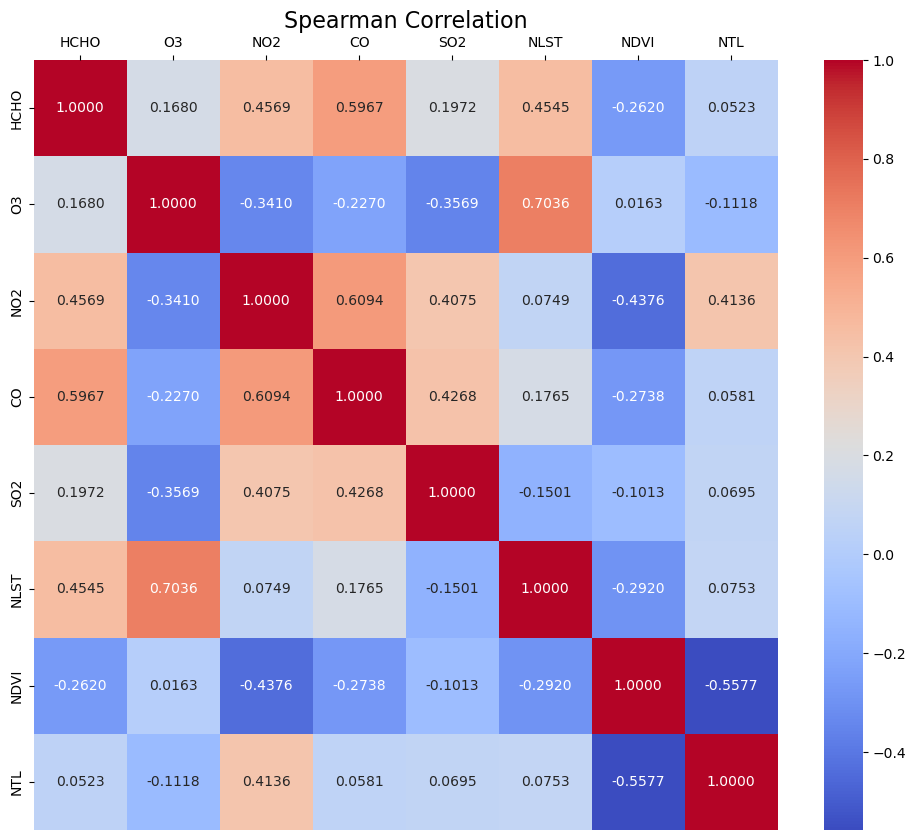

In [220]:
data = pd.DataFrame({
    'HCHO': HCHO_all_vals,
    'O3': O3_all_vals,
    'NO2': NO2_all_vals,
    'CO': CO_all_vals,
    'SO2': SO2_all_vals,
    'NLST': NLST_all_vals,
    'NDVI': NDVI_all_vals,
    'NTL' : NTL_all_vals
})

# Calculate the correlation matrix
correlation_matrix = data.corr(method='spearman')
cols=correlation_matrix.columns.tolist()
plt.figure(figsize=(12,10))
ax=sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", xticklabels=cols, yticklabels=cols,fmt=".4f")
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.title('Spearman Correlation',fontsize=16)
# Display the correlation matrix
print(correlation_matrix)

In [221]:
def scale(array):
    array=np.array(array)
    new_array=(array - array.min()) / (array.max() - array.min())
    return new_array

In [222]:
HCHO_scaled=scale(HCHO_all_vals)
O3_scaled=scale(O3_all_vals)
NO2_scaled=scale(NO2_all_vals)
CO_scaled=scale(CO_all_vals)
SO2_scaled=scale(SO2_all_vals)
NLST_scaled=scale(NLST_all_vals)
NDVI_scaled=scale(NDVI_all_vals)
NTL_scaled=scale(NTL_all_vals)

In [223]:
from sklearn.linear_model import LinearRegression

avg_pollution=(HCHO_scaled+O3_scaled+NO2_scaled+CO_scaled+SO2_scaled)/5
indicators=[]

for i in range(len(HCHO_scaled)):
    ind=[NDVI_scaled[i],NLST_scaled[i],NTL_scaled[i]]
    indicators.append(np.array(ind))
indicators=np.array(indicators)

model = LinearRegression()

# Fit the model
model.fit(indicators,avg_pollution)

print(f"Coefficients: NDVI: {round(model.coef_[0],8)} , NLST: {round(model.coef_[1],8)} , NTL: {round(model.coef_[2],8)}")
print(f"Average Air pollution = {round(model.coef_[0],8)} NDVI + {round(model.coef_[1],8)} NLST + {round(model.coef_[2],8)} NTL ")

Coefficients: NDVI: -0.25844161 , NLST: 0.20057609 , NTL: -0.07407226
Average Air pollution = -0.25844161 NDVI + 0.20057609 NLST + -0.07407226 NTL 


In [224]:
def fit_and_display(pollutant_vals, pollutant_name):
    model = LinearRegression()
    model.fit(indicators, pollutant_vals)
    
    # Output regression coefficients for each pollutant
    print(f"{pollutant_name} = {round(model.coef_[0], 8)} NDVI + {round(model.coef_[1], 8)} NLST + {round(model.coef_[2], 8)} NTL")
    #print(f"Intercept: {round(model.intercept_, 8)}\n")

# Fit and display results for each pollutant
fit_and_display(HCHO_scaled, 'HCHO')
fit_and_display(O3_scaled, 'O3')
fit_and_display(NO2_scaled, 'NO2')
fit_and_display(CO_scaled, 'CO')
fit_and_display(SO2_scaled, 'SO2')

HCHO = -0.35576926 NDVI + 0.27600624 NLST + -0.19914268 NTL
O3 = -0.01216262 NDVI + -0.13589057 NLST + -0.17102117 NTL
NO2 = -0.40332118 NDVI + 0.28735663 NLST + 0.24108148 NTL
CO = -0.42613088 NDVI + 0.46469406 NLST + -0.2520415 NTL
SO2 = -0.09482413 NDVI + 0.11071408 NLST + 0.01076255 NTL


In [225]:
CO_scaled = scale(CO_Avg)
NO2_scaled = scale(NO2_Avg)
O3_scaled = scale(O3_Avg)
SO2_scaled = scale(SO2_Avg)
HCHO_scaled = scale(HCHO_Avg)
NLST_scaled = scale(NLST_Avg)
NDVI_scaled = scale(NDVI_Avg)
NTL_scaled = scale(NTL_Avg)


In [226]:
avg_pollution=(HCHO_scaled+O3_scaled+NO2_scaled+CO_scaled+SO2_scaled)/5
indicators=[]

for i in range(len(HCHO_scaled)):
    ind=[NDVI_scaled[i],NLST_scaled[i],NTL_scaled[i]]
    indicators.append(np.array(ind))
indicators=np.array(indicators)

model = LinearRegression()

# Fit the model
model.fit(indicators,avg_pollution)

print(f"Coefficients: NDVI: {round(model.coef_[0],8)} , NLST: {round(model.coef_[1],8)} , NTL: {round(model.coef_[2],8)}")
print(f"Average Air pollution = {round(model.coef_[0],8)} NDVI + {round(model.coef_[1],8)} NLST + {round(model.coef_[2],8)} NTL ")

Coefficients: NDVI: -0.29360884 , NLST: 0.23262996 , NTL: 0.084568
Average Air pollution = -0.29360884 NDVI + 0.23262996 NLST + 0.084568 NTL 


In [227]:
from sklearn.linear_model import LinearRegression

def fit_and_display(pollutant_vals, pollutant_name):
    model = LinearRegression()
    model.fit(indicators, pollutant_vals)
    
    # Output regression coefficients for each pollutant
    print(f"{pollutant_name} = {round(model.coef_[0], 8)} NDVI + {round(model.coef_[1], 8)} NLST + {round(model.coef_[2], 8)} NTL")
    #print(f"Intercept: {round(model.intercept_, 8)}\n")

# Fit and display results for each pollutant
fit_and_display(HCHO_scaled, 'HCHO')
fit_and_display(O3_scaled, 'O3')
fit_and_display(NO2_scaled, 'NO2')
fit_and_display(CO_scaled, 'CO')
fit_and_display(SO2_scaled, 'SO2')

HCHO = -0.44650192 NDVI + 0.33146558 NLST + 0.01049771 NTL
O3 = -0.0098661 NDVI + -0.04936723 NLST + -0.4094445 NTL
NO2 = -0.48860283 NDVI + 0.27611827 NLST + 0.49761246 NTL
CO = -0.37135992 NDVI + 0.45483579 NLST + -0.06902231 NTL
SO2 = -0.15171343 NDVI + 0.1500974 NLST + 0.39319664 NTL
